In [40]:
import math,io,sys
import umap
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
from itertools import combinations, product, permutations
from scipy import signal, fftpack
from scipy.stats import cumfreq
%matplotlib inline
from itertools import product, islice
import multiprocess as multiprocessing
from sklearn.metrics import mean_squared_error, mean_absolute_error


RHO_CUTOFF = 0.4

plt.rcParams.update({'font.size': 15})
plt.rcParams["figure.figsize"] = [16,16]

np.set_printoptions(threshold=sys.maxsize)

In [2]:
# def strip_trailing_nans(arr):
#     index_of_first_nonnan = np.where(~np.isnan(arr[::-1]))[0]
#     if len(index_of_first_nonnan) == 0:
#         return np.array([]), arr
    
#     n_trailing_nans = index_of_first_nonnan[0]
#     nan_array = arr[-n_trailing_nans:]
#     stripped_array = arr[:-n_trailing_nans] if n_trailing_nans != 0 else arr
#     return stripped_array, nan_array

# def start_of_nan_blocks(arr):
#     isnan_array = np.isnan(arr)
#     starts = np.where((isnan_array[:-1] == False) & (isnan_array[1:] == True))[0] + 1
    
#     if isnan_array[0]:
#         starts = np.insert(starts, 0, 0)
    
#     return starts

# def maximize_correlation(temp_arr, nan_arr, nan_blocks, mean_rho):
#     best_arr = None
#     best_correlation = -np.inf
    
#     # Number of places to insert the NaNs
#     num_places = len(nan_arr)

#     # Add the position after the last element to nan_blocks
#     nan_blocks = np.append(nan_blocks, len(temp_arr))

#     # For each possible way to insert the NaNs
#     for places in product(nan_blocks, repeat=num_places):
#         modified_arr = temp_arr.copy()
#         adjust = 0
        
#         for p in sorted(places):
#             modified_arr = np.insert(modified_arr, p + adjust, np.nan)
#             adjust += 1
        
#         valid_indices = ~np.isnan(modified_arr) * ~np.isnan(mean_rho)
        
#         # Ensure the lengths match before calculating correlation
#         if len(modified_arr) == len(mean_rho):
#             # Calculate the correlation between the modified temp_arr and mean_rho
#             correlation = np.corrcoef(modified_arr[valid_indices], mean_rho[valid_indices])[0, 1]

#             if correlation > best_correlation:
#                 best_correlation = correlation
#                 best_arr = modified_arr

#     return best_arr


# def increase_correlation_slow(mean_ed, mean_rho):
#     temp_arr, nan_arr = strip_trailing_nans(mean_ed)
#     nan_blocks = start_of_nan_blocks(temp_arr)

#     if len(nan_blocks) > 5:
#         return mean_ed

#     result = maximize_correlation(temp_arr, nan_arr, nan_blocks, mean_rho)
#     return result

In [3]:
# def align_using_xcorr(mean_ed, mean_rho):
#     # Find start and end indices of nan blocks in mean_rho
#     nan_blocks = np.where(np.isnan(mean_ed))[0]

#     print(repr(mean_ed))
#     print(repr(mean_rho))
    
#     if not len(nan_blocks):
#         return mean_ed

#     nan_starts = np.insert(nan_blocks[np.where(np.diff(nan_blocks) != 1)[0]], 0, nan_blocks[0])
#     nan_ends = np.append(nan_blocks[np.where(np.diff(nan_blocks) != 1)[0]], nan_blocks[-1])

#     # Identify segments to align based on the nan blocks
#     segments = [(0, nan_starts[0])] + list(zip(nan_ends[:-1] + 1, nan_starts[1:])) + [(nan_ends[-1] + 1, len(mean_rho))]
    
#     aligned_mean_ed = np.array([])

#     print(segments)

#     for start, end in segments:
#         chunk_rho = mean_rho[start:end]
#         chunk_ed = mean_ed[start:end]

#         # Filter out NaN values
#         valid_indices = (~np.isnan(chunk_rho)) & (~np.isnan(chunk_ed))
        
#         valid_rho = chunk_rho[valid_indices]
#         valid_ed = chunk_ed[valid_indices]
#         print(valid_rho)
#         print(valid_ed)
        
#         # Compute cross-correlation
#         correlation = np.correlate(valid_rho, valid_ed, mode='full')
        
#         # Find the lag that maximizes the cross-correlation
#         lag = correlation.argmax() - (len(valid_rho) - 1)
        
#         # Align the chunk of mean_ed using the identified lag
#         aligned_chunk = np.roll(chunk_ed, -lag)
#         aligned_mean_ed = np.concatenate([aligned_mean_ed, aligned_chunk])

#     return aligned_mean_ed


/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

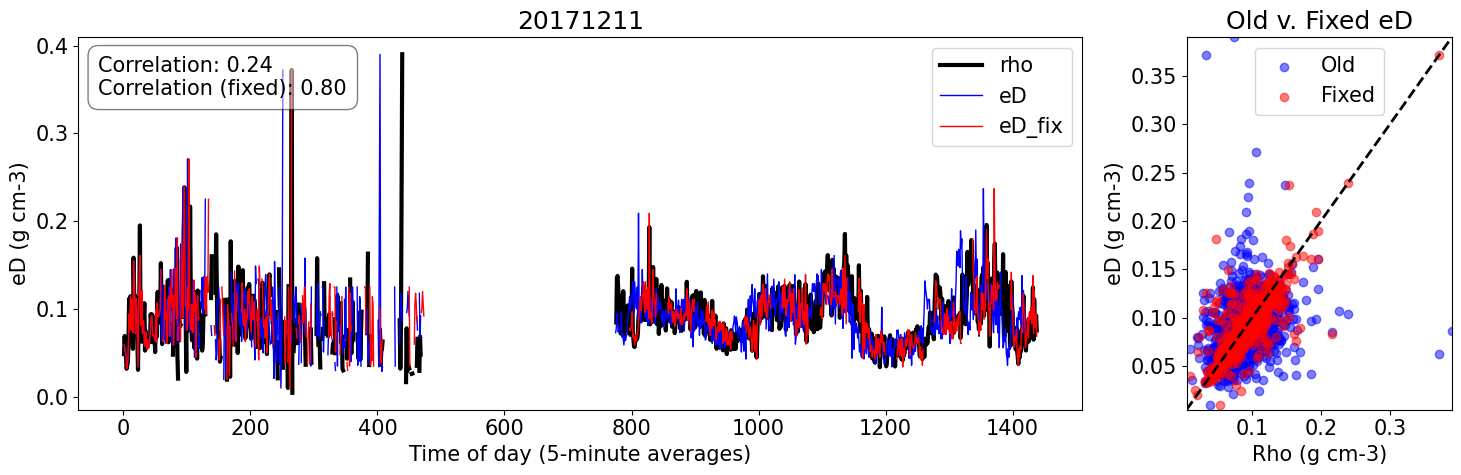

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

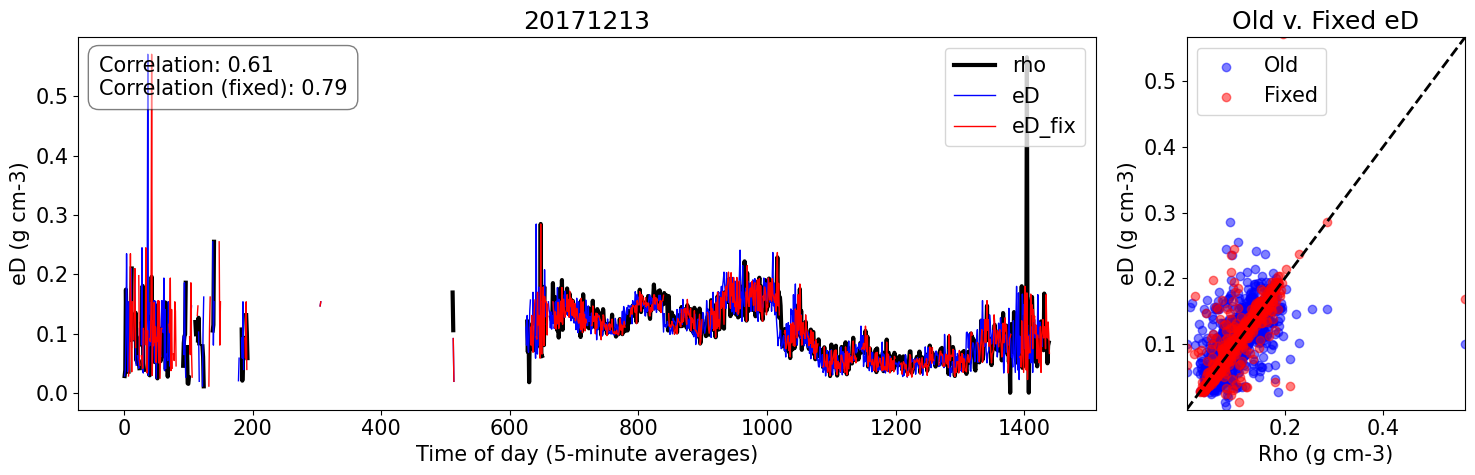

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

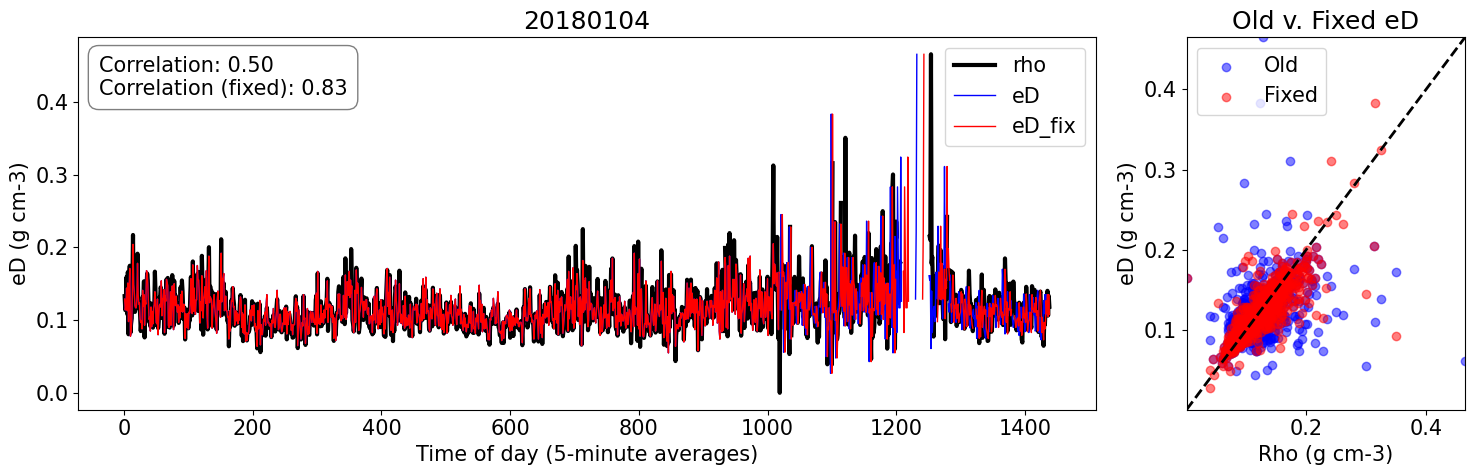

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

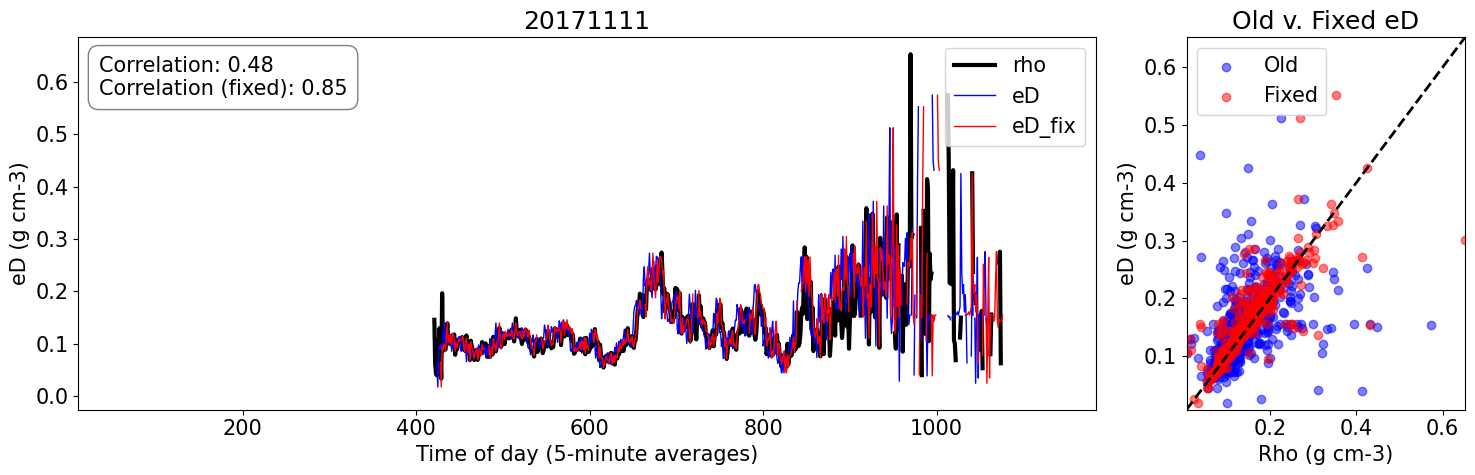

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


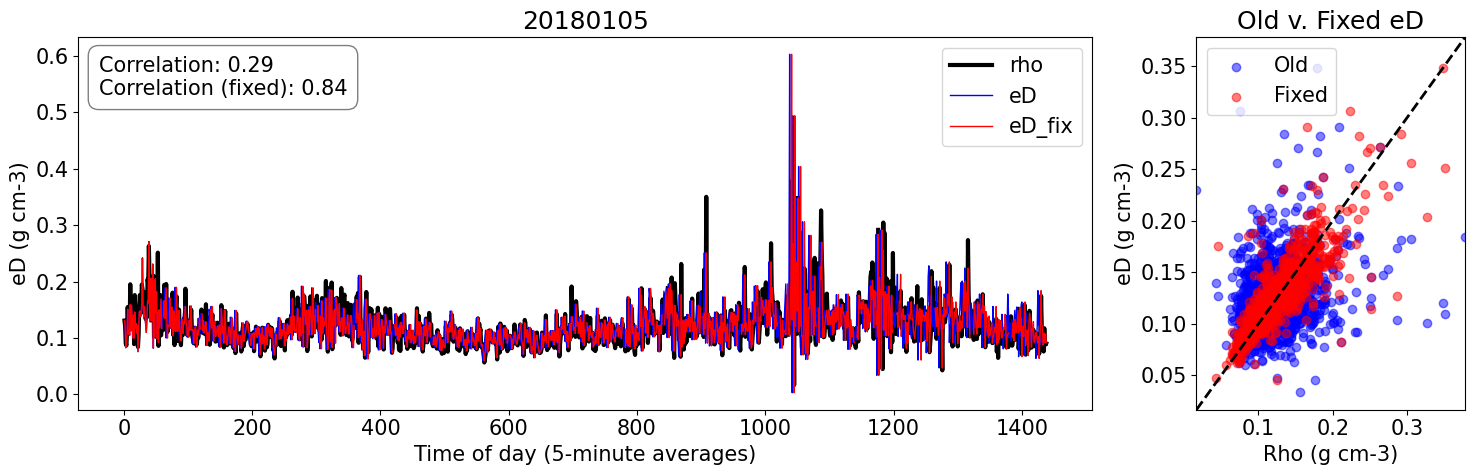

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

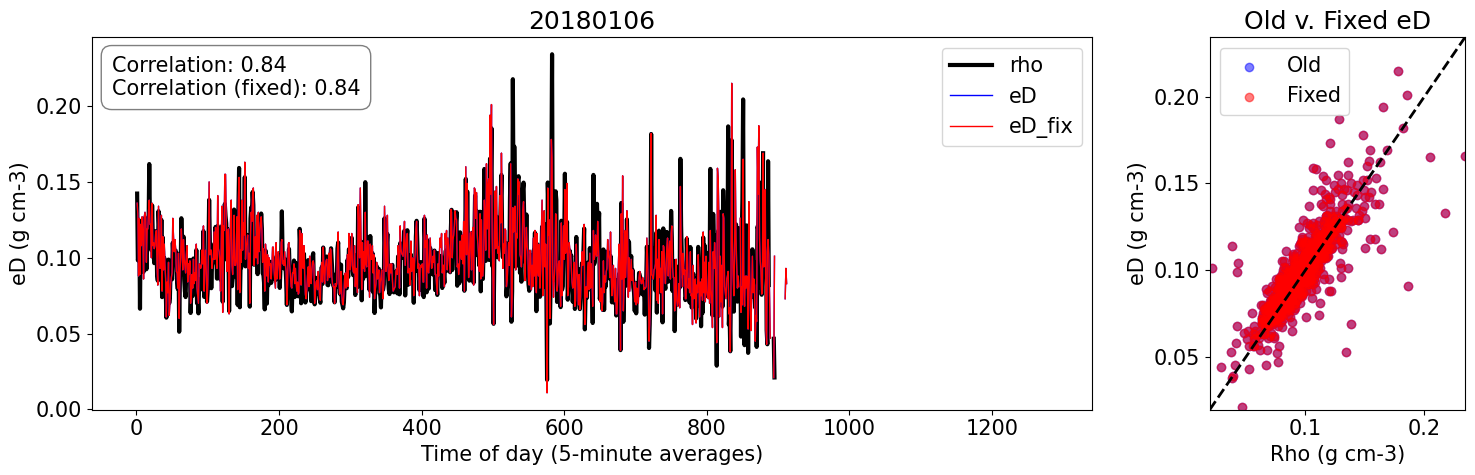

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

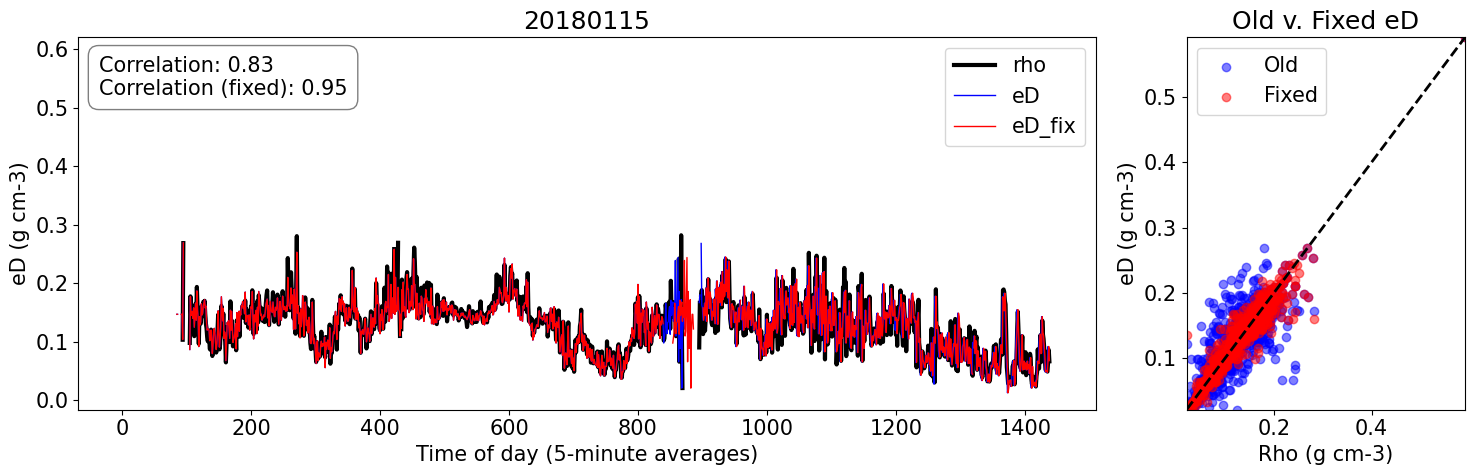

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

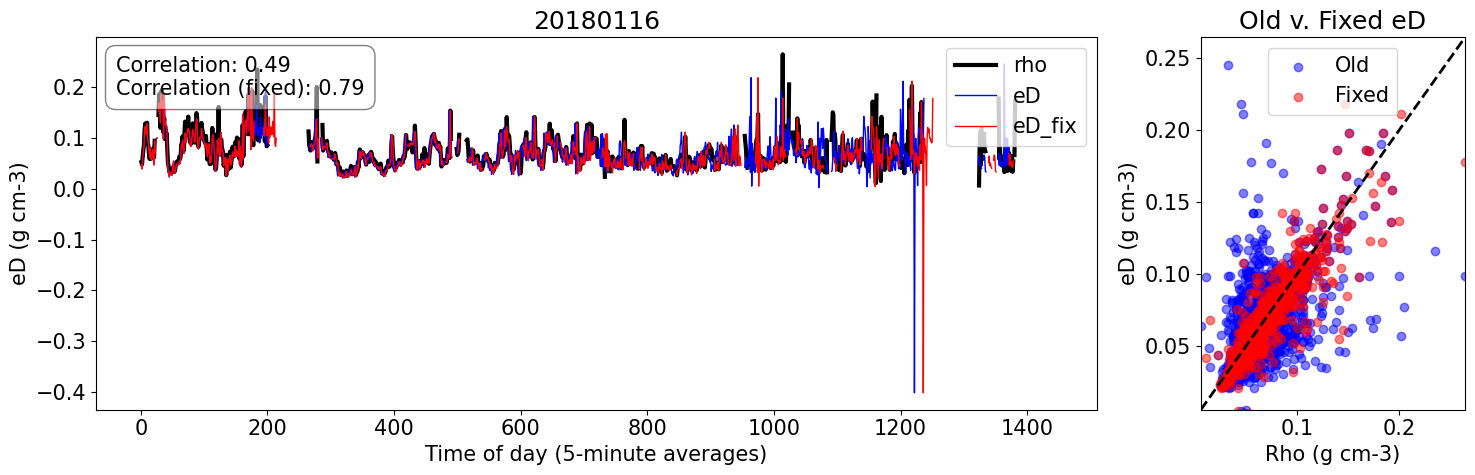

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

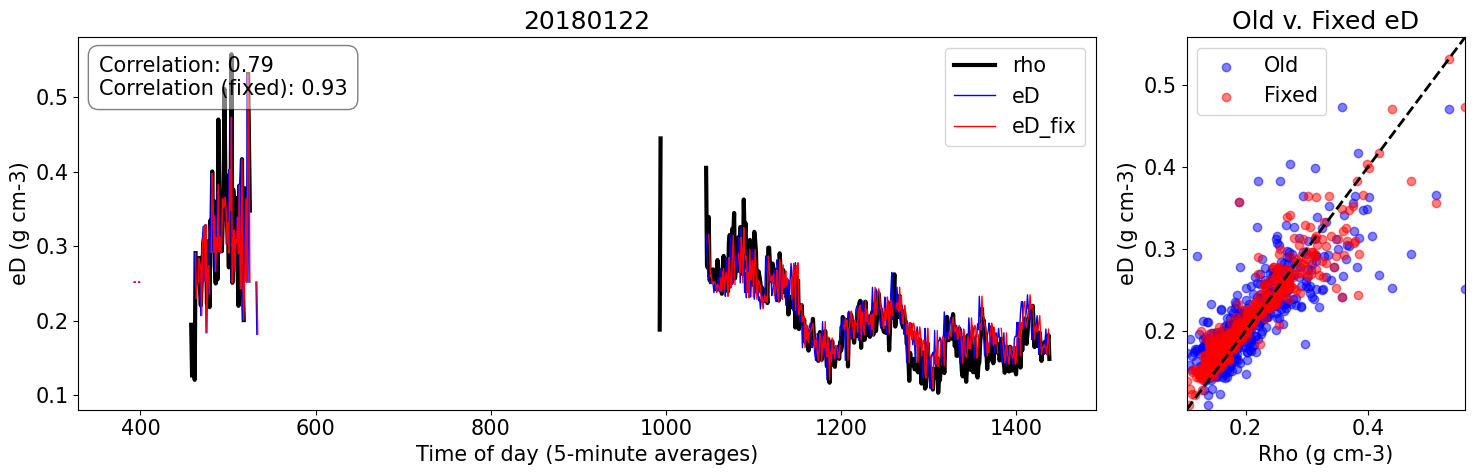

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


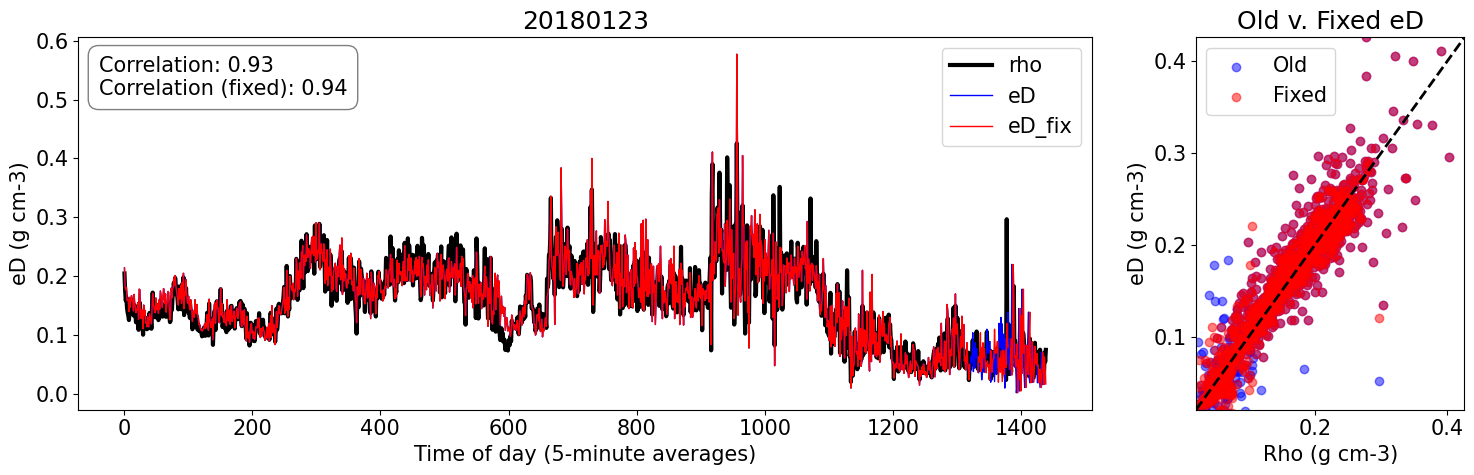

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

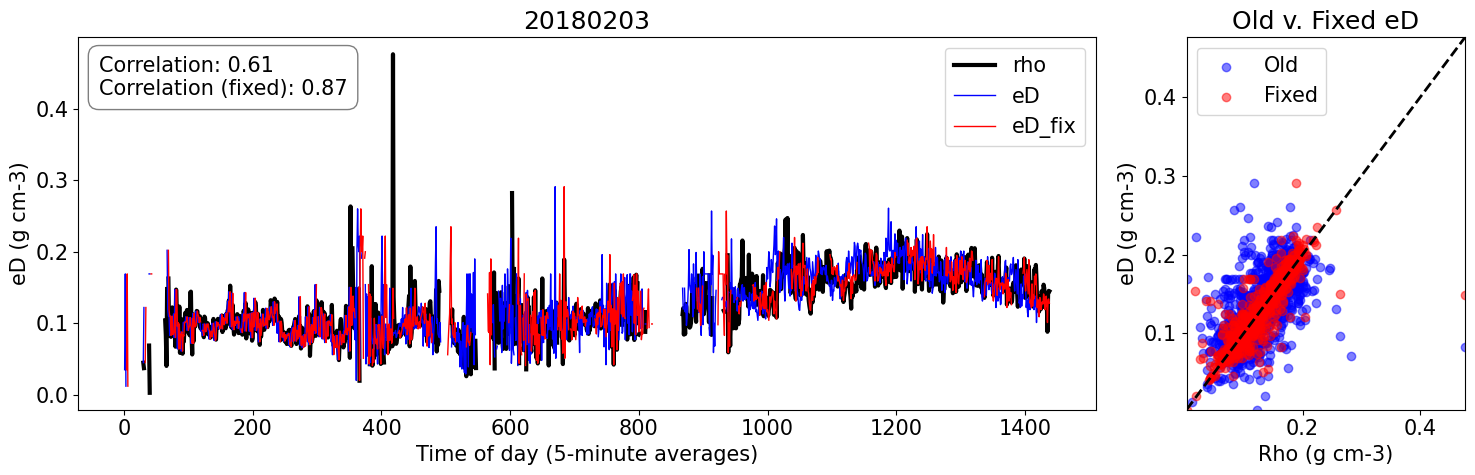

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

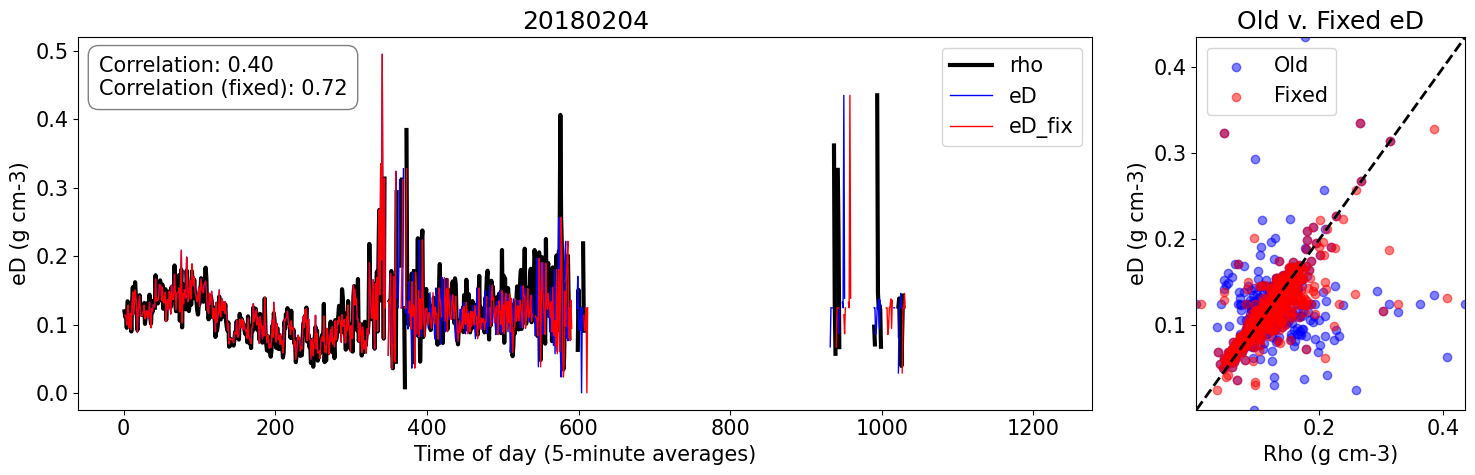

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

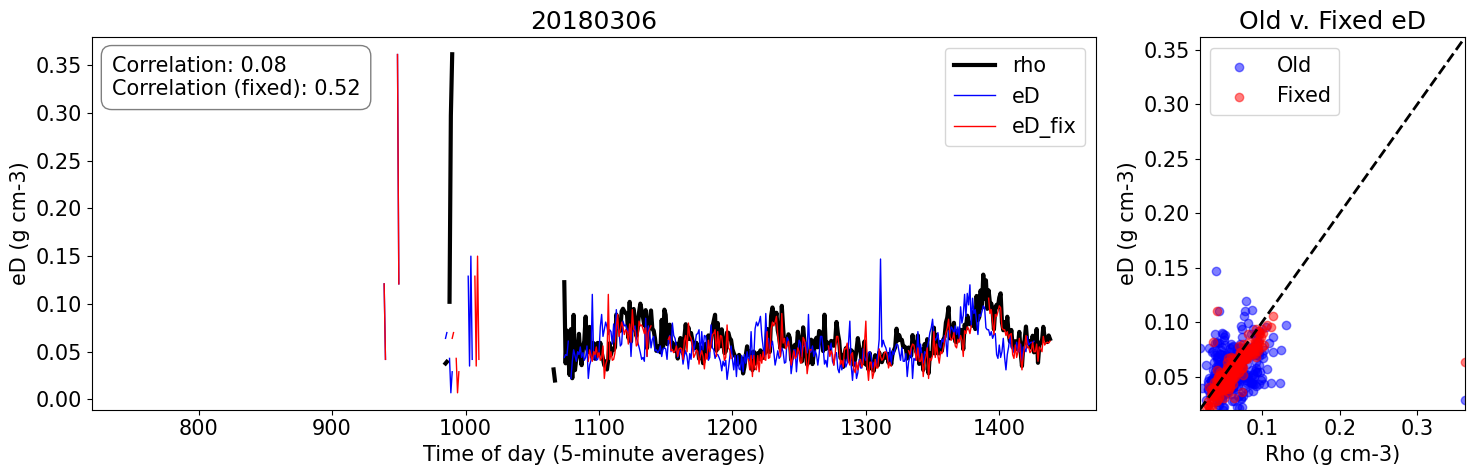

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


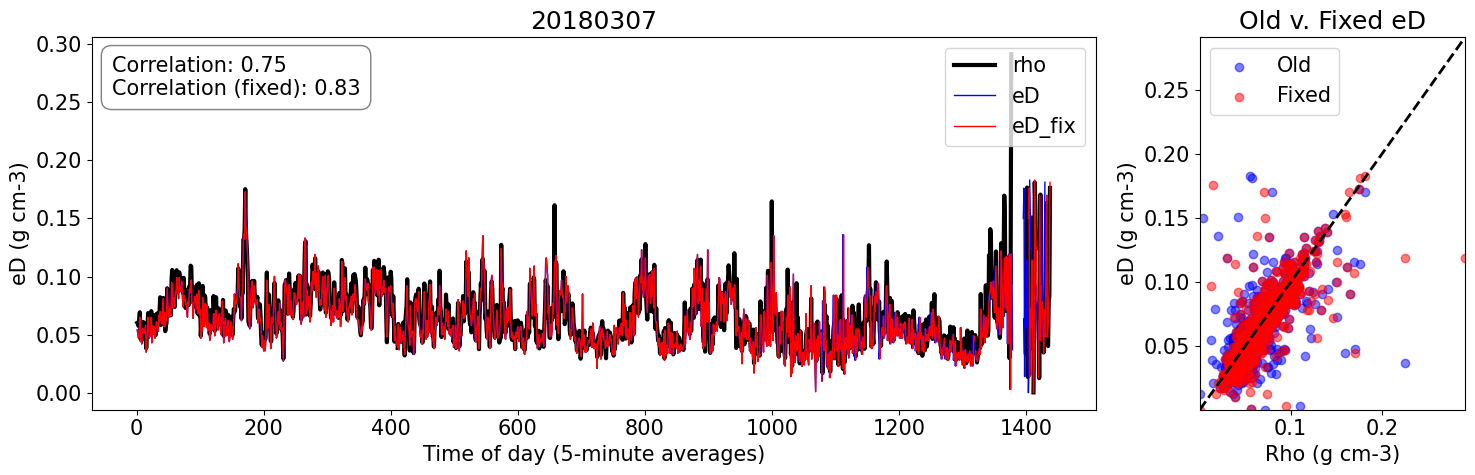

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

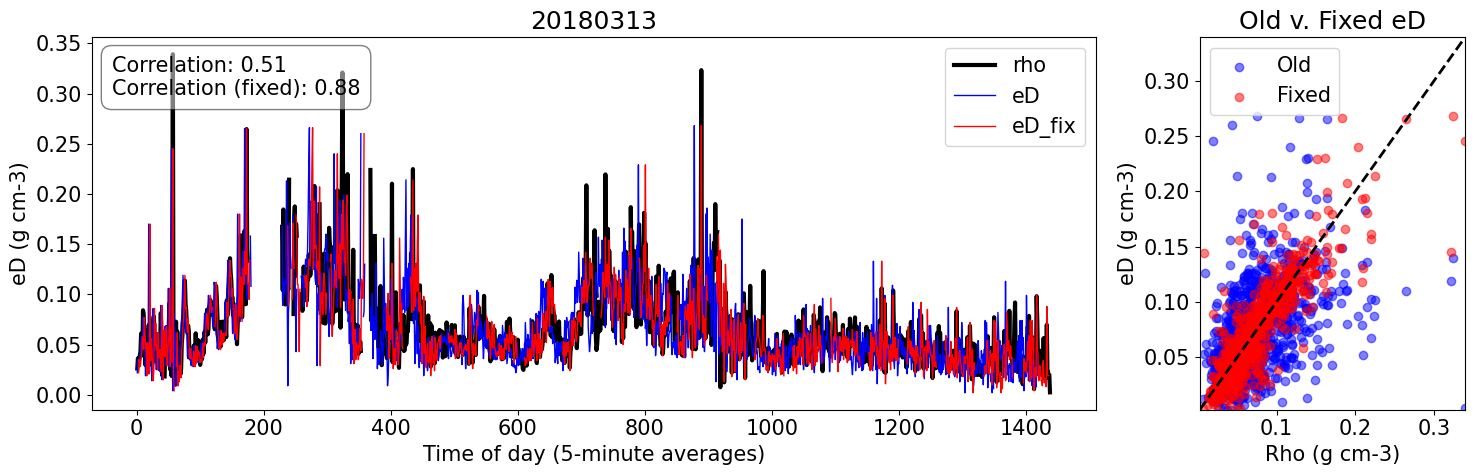

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

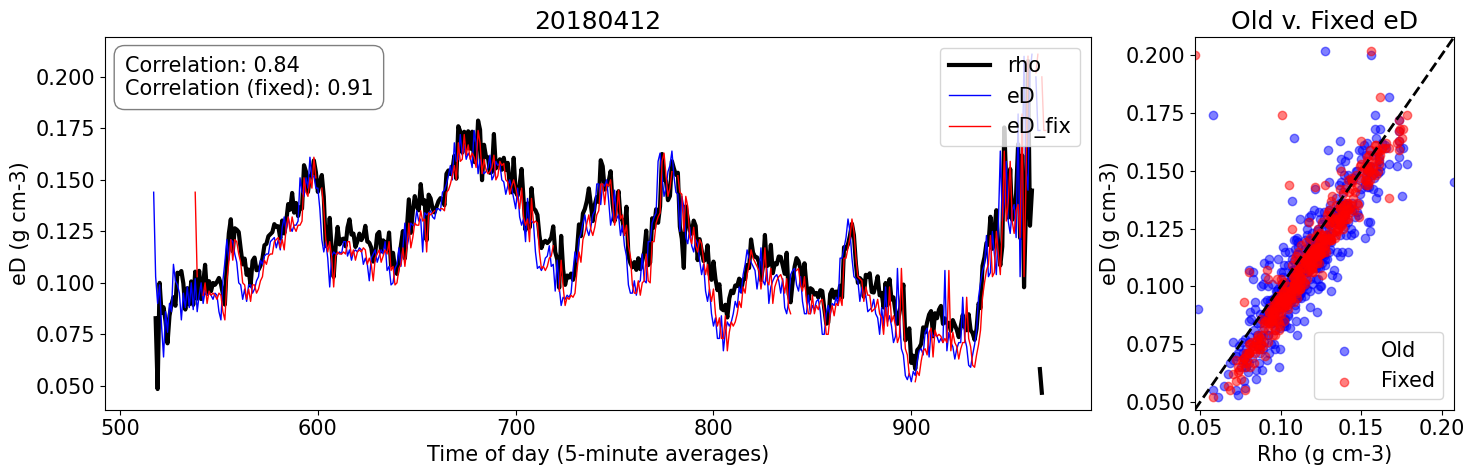

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


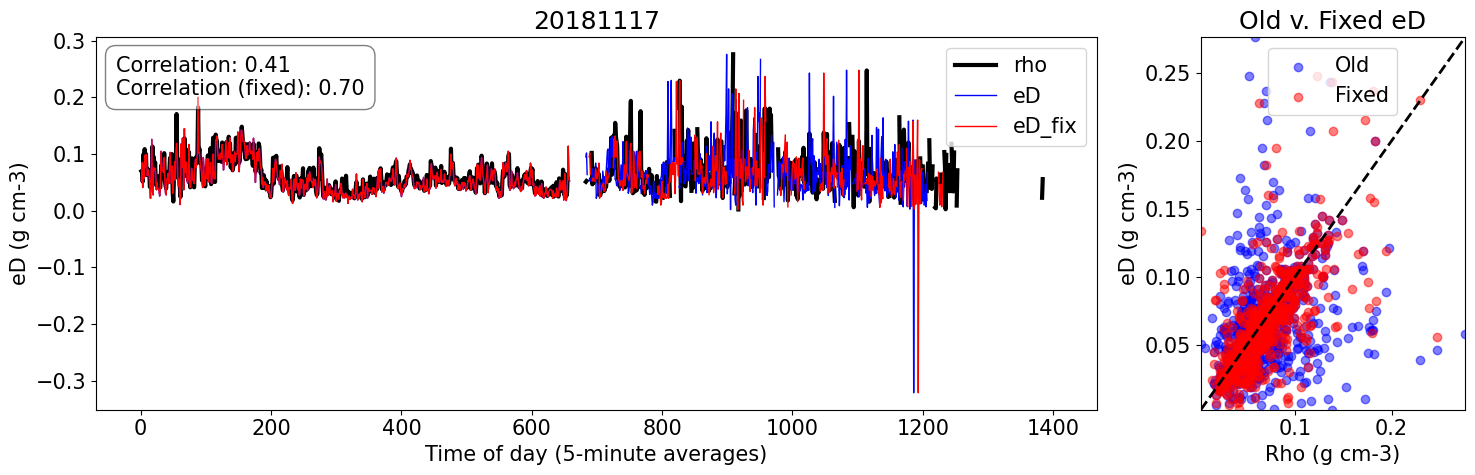

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

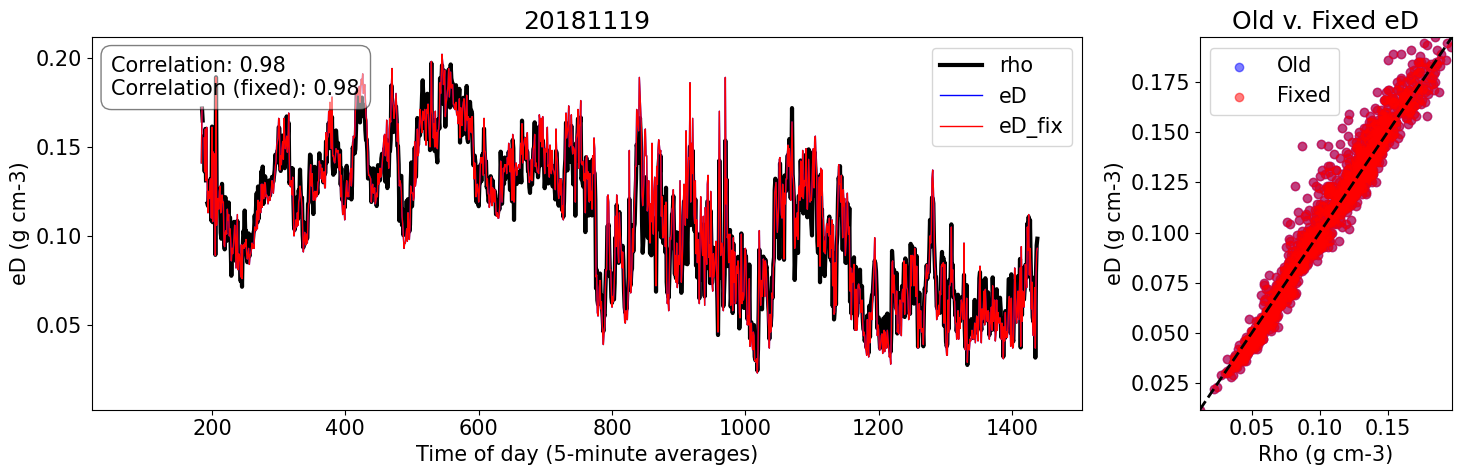

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

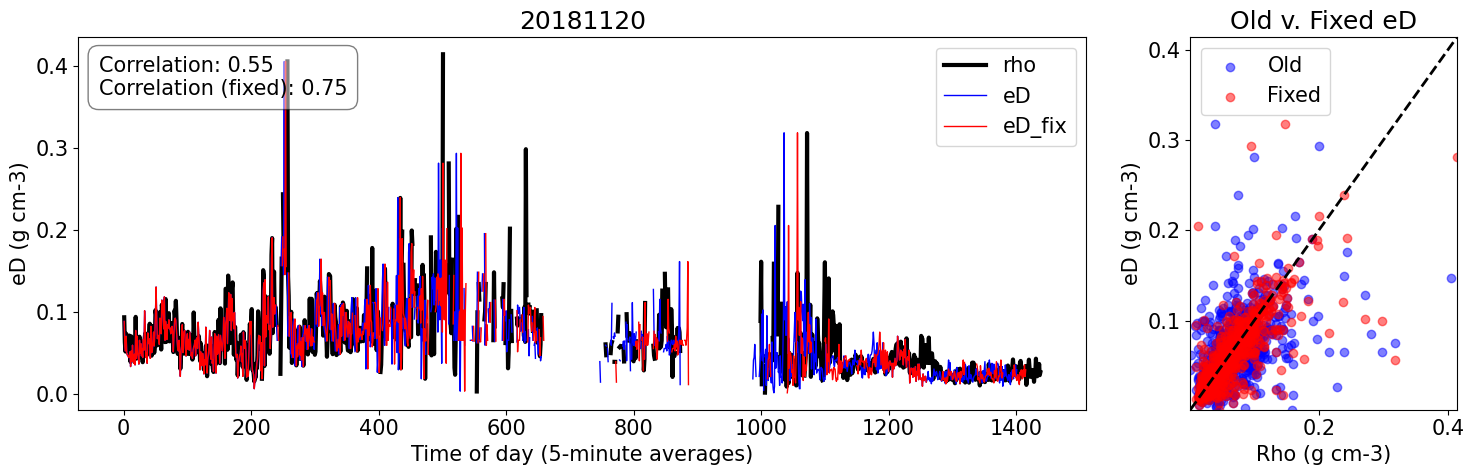

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


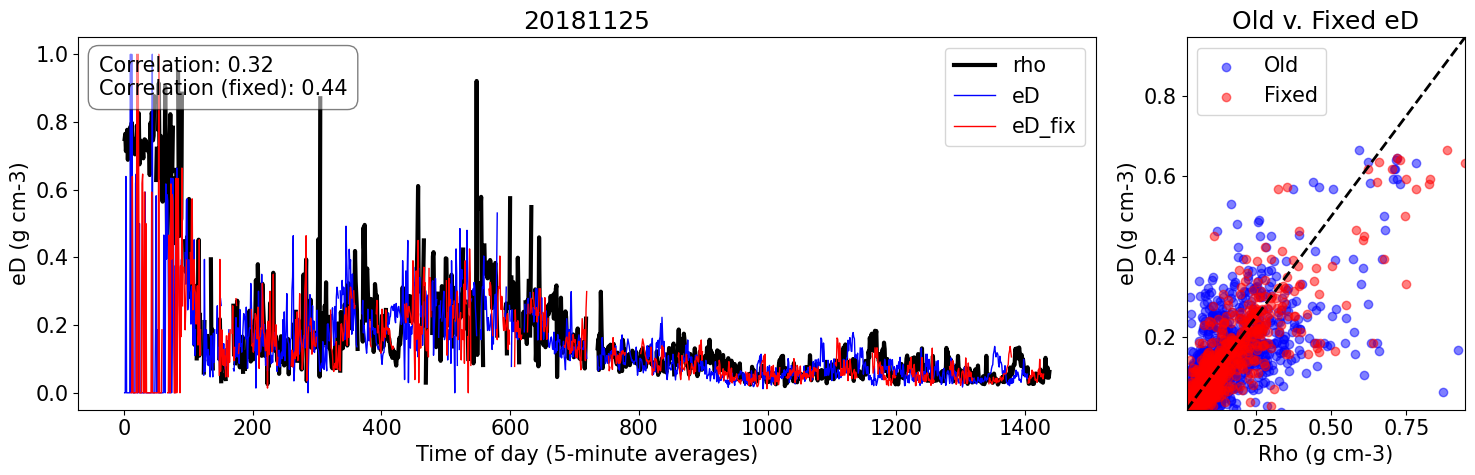

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


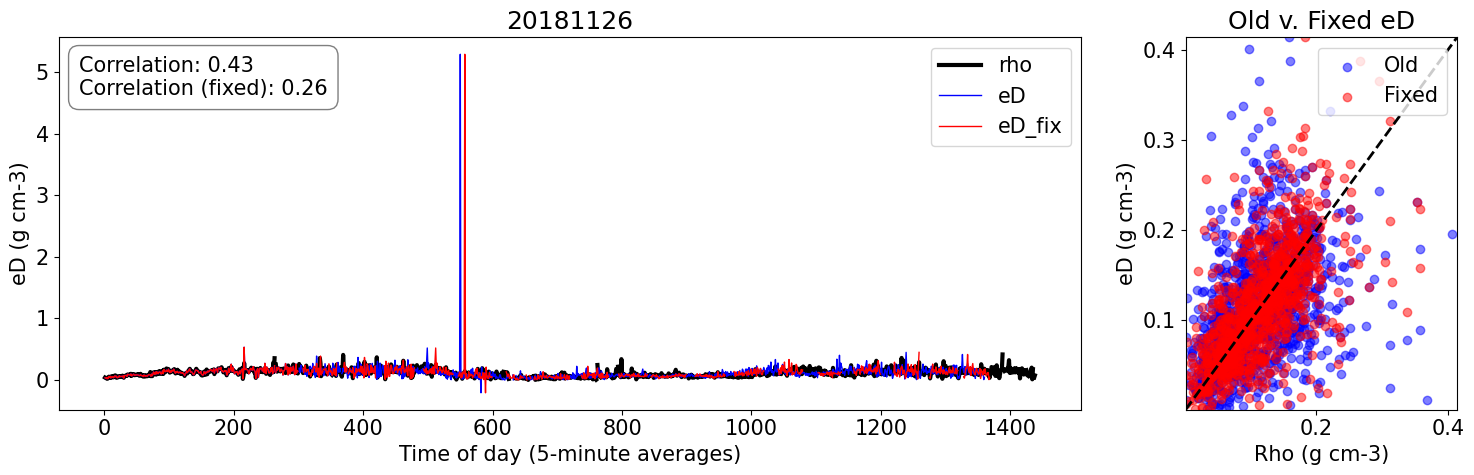

Correction performs worse


/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

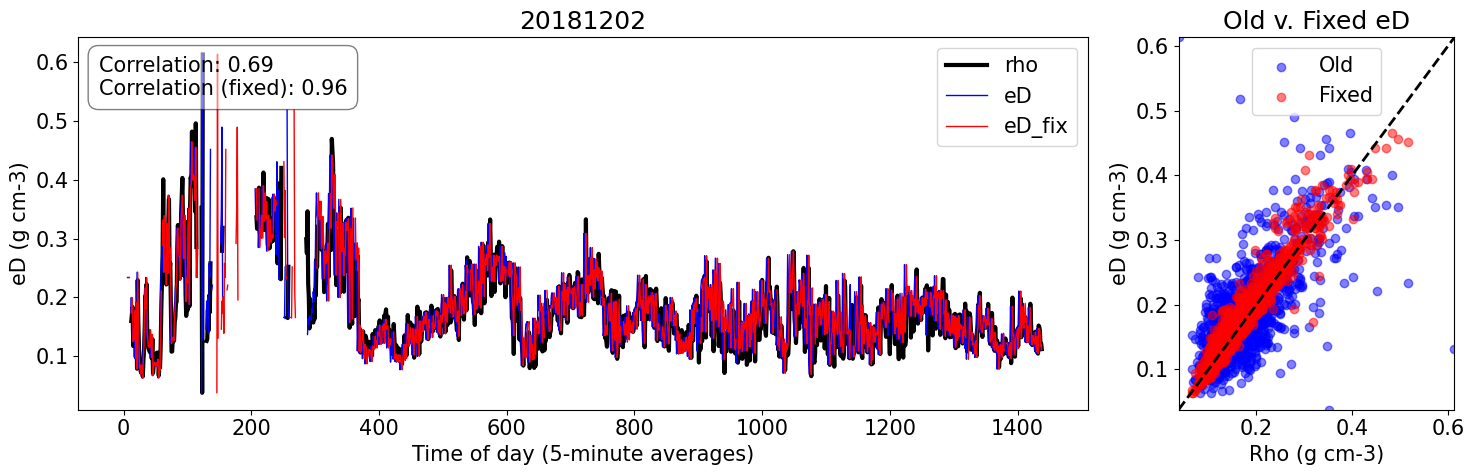

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


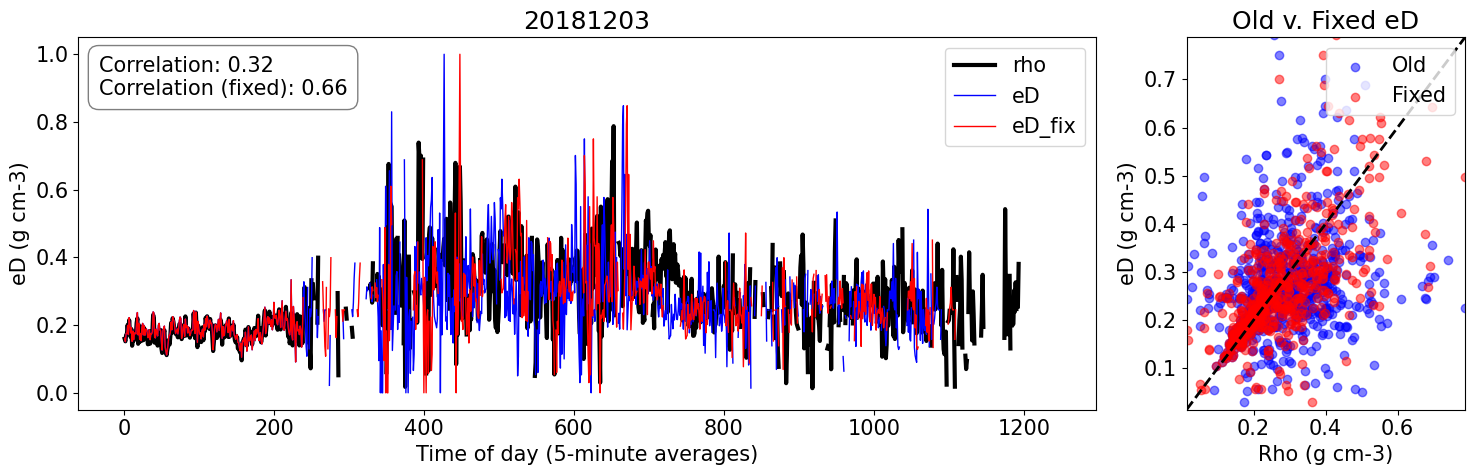

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2705: RuntimeWarning: divide by zero encountered in

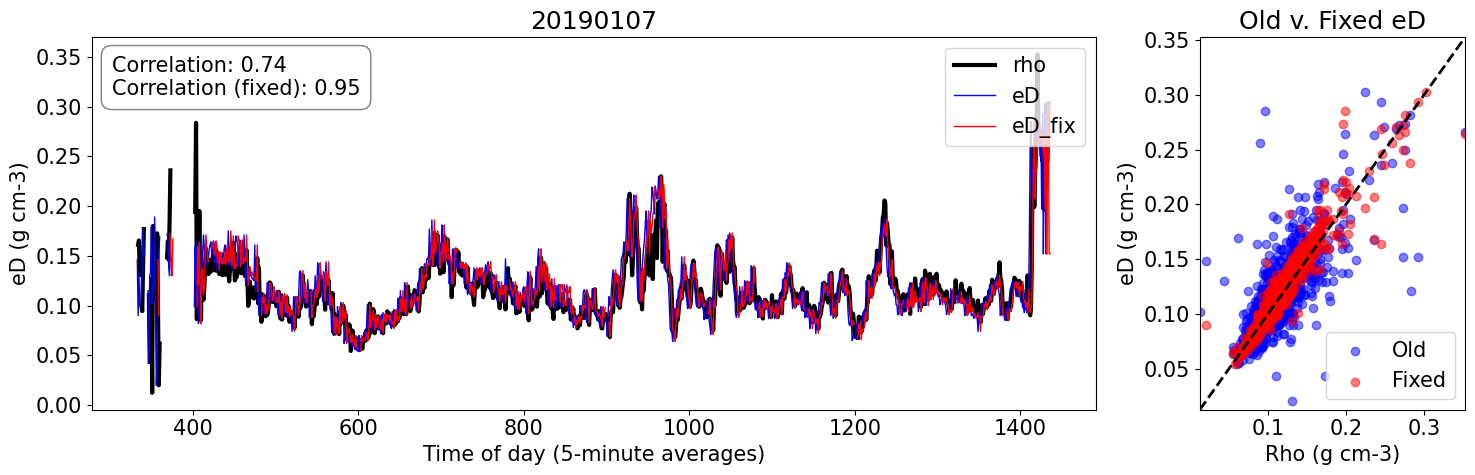

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


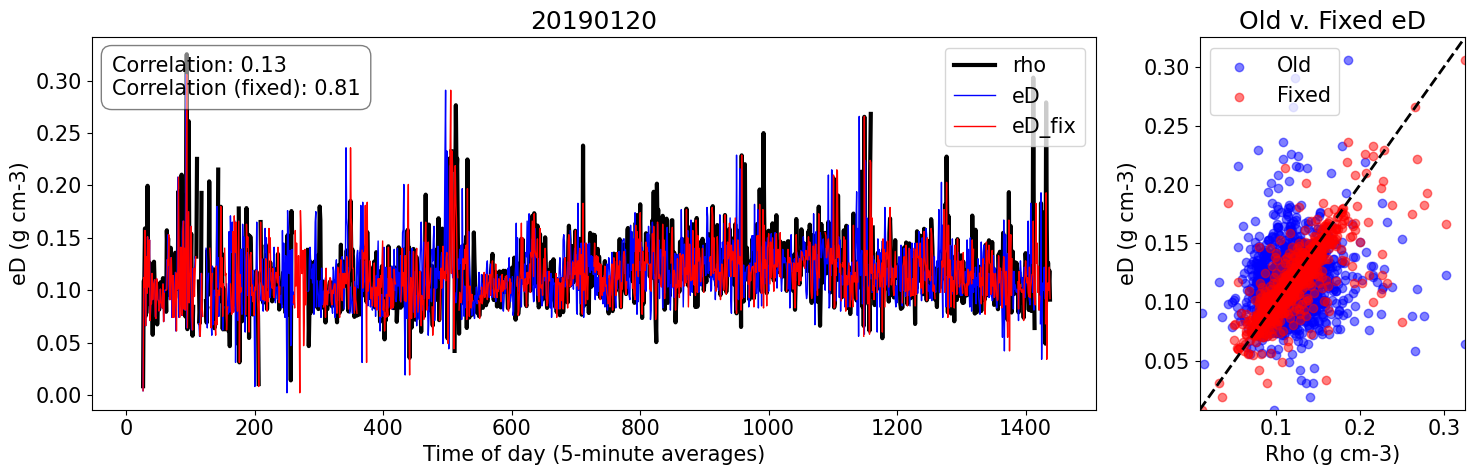

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_22382/2789016883.py:51: RuntimeWarning: Mean of empty slice
  rho_data = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /

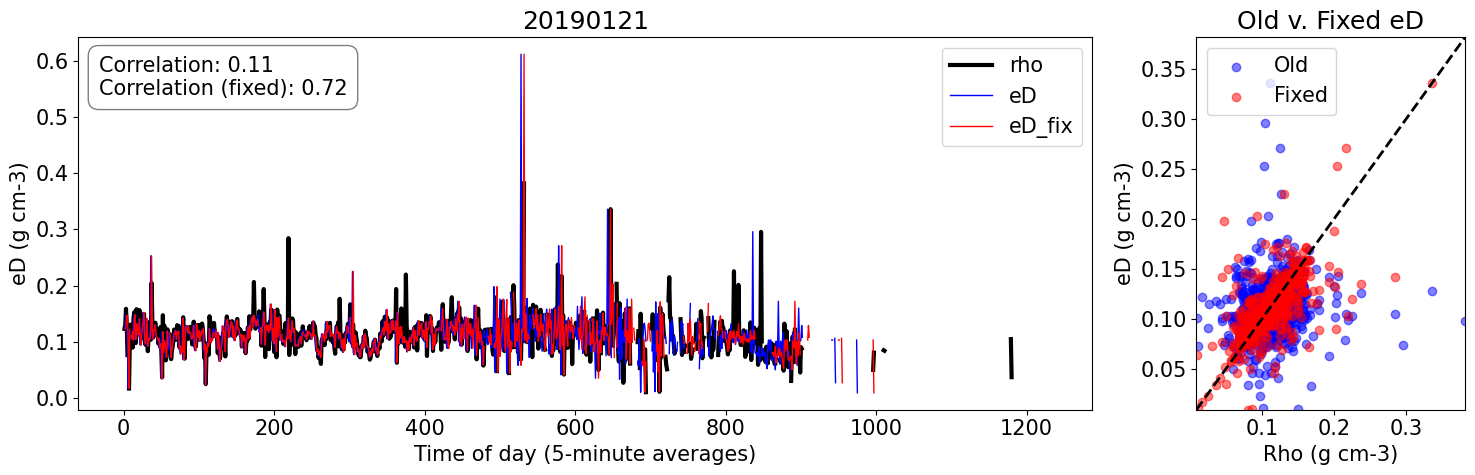

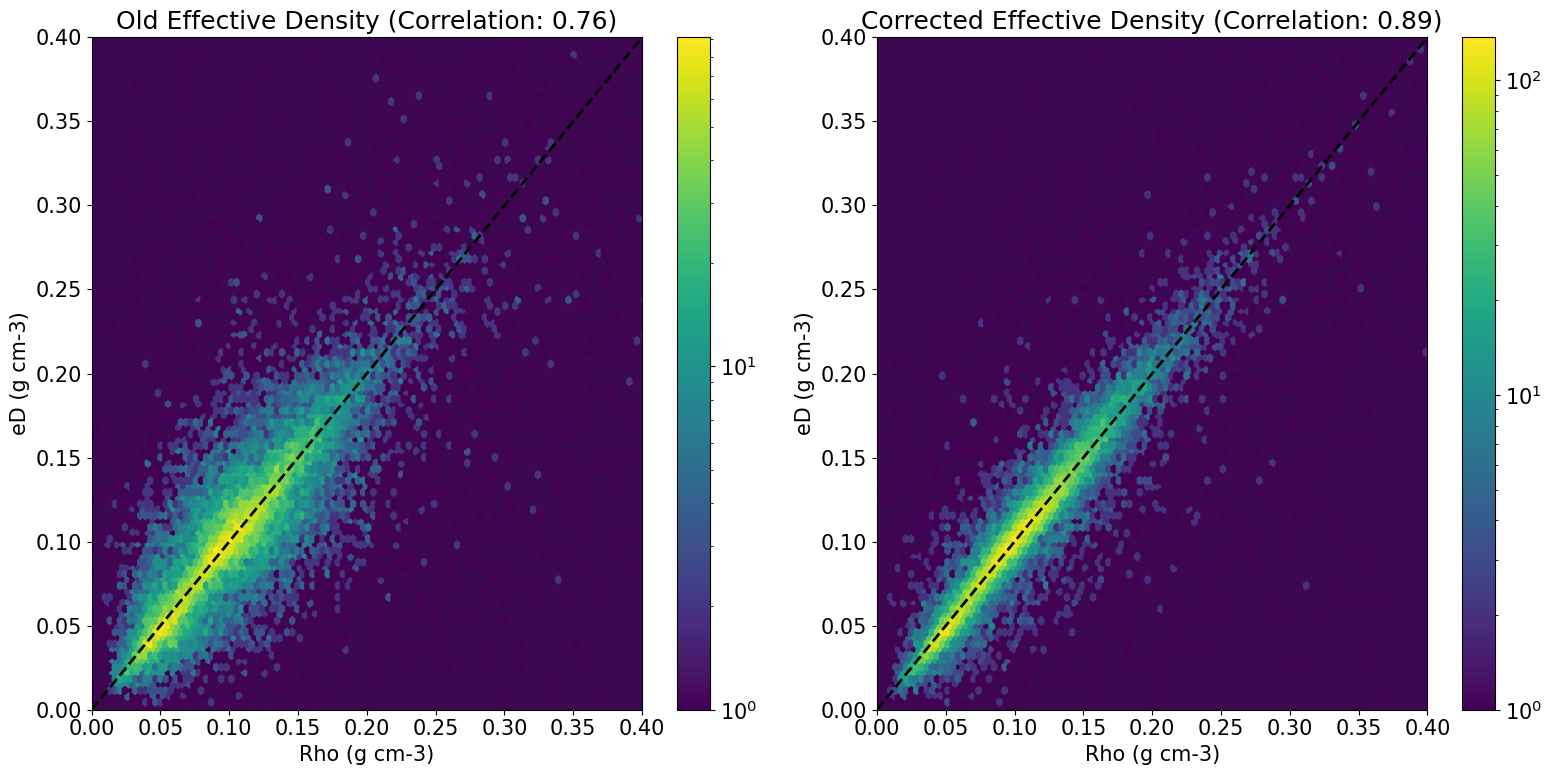

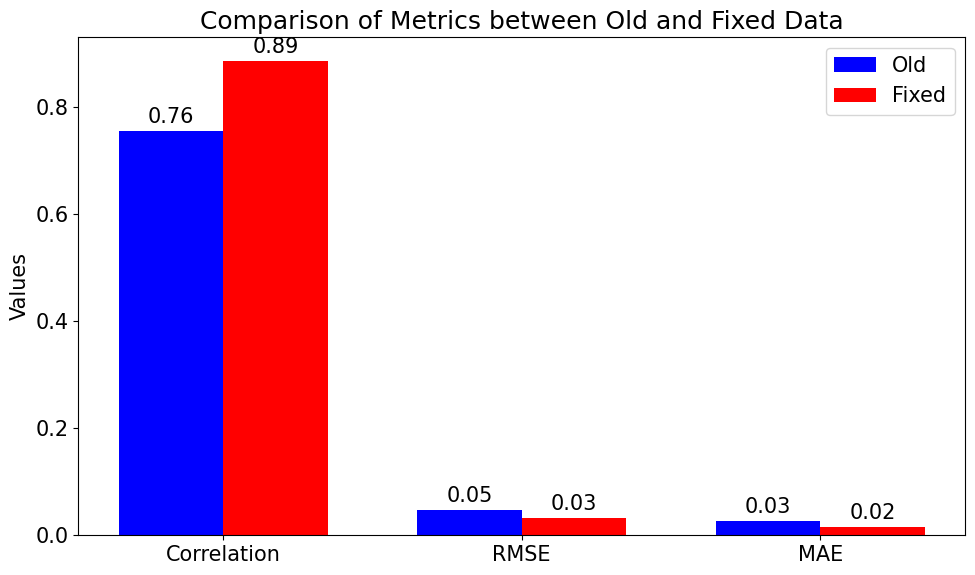

0.7561570157466015 0.8863135031504218


In [41]:
TIME_GROUP = 1

def calculate_correlation(a, b):
    # Assuming lengths are the same and contain no NaNs
    return np.corrcoef(a, b)[0, 1]

def best_align_slice(ed_slice, rho_slice, max_nan_prepend=25):
    best_correlation = -np.inf
    best_n = 0
    
    for n in range(max_nan_prepend + 1): # +1 to include the 0 nans case
        # Add np.nans at the beginning and trim the end
        aligned_ed_slice = np.concatenate([np.array([np.nan] * n), ed_slice[:-n] if n != 0 else ed_slice])

        # Drop nans for correlation calculation
        valid_ed = aligned_ed_slice[~np.isnan(rho_slice) & ~np.isnan(aligned_ed_slice)]
        valid_rho = rho_slice[~np.isnan(rho_slice) & ~np.isnan(aligned_ed_slice)]
        
        if len(valid_ed) == 0:
            continue
        
        correlation = calculate_correlation(valid_ed, valid_rho)
        
        if correlation > best_correlation:
            best_correlation = correlation
            best_n = n
    
    # Apply the best transformation to the slice using `best_n` instead of `n`
    return np.concatenate([np.array([np.nan] * best_n), ed_slice[:-best_n] if best_n != 0 else ed_slice])

def align_ed_data(ed_data, rho_data, chunk_size=60, max_nan_prepend=25):
    fixed_ed_data = []


    for i in range(0, len(ed_data), chunk_size):
        ed_slice = ed_data[i:i+chunk_size]
        rho_slice = rho_data[i:i+chunk_size]
        
        aligned_ed_slice = best_align_slice(ed_slice, rho_slice, max_nan_prepend)
        fixed_ed_data.extend(aligned_ed_slice)

    return np.asarray(fixed_ed_data)

def perf_fix(date):
    rho_path = '/Users/fraserking/Development/pip_processing/ed_timing/edensity_distributions/006' + date + '2350_01_rho_Plots_D_minute.nc'
    ed_path = '/Users/fraserking/Development/pip_processing/ed_timing/edensity_lwe_rate/006' + date + '2350_01_P_Minute.nc'
    rho_ds = xr.open_dataset(rho_path)
    ed_ds = xr.open_dataset(ed_path)
    non_zeros_rho = rho_ds['rho'].where(rho_ds['rho'] != 0)
    resampled_rho = non_zeros_rho.resample(time=str(TIME_GROUP)+'T').mean('time', skipna=True).values
    rho_data = np.nanmean(resampled_rho, axis=1)
    reshaped_data = ed_ds['ed'].values.reshape(-1, TIME_GROUP)
    ed_data = reshaped_data.mean(axis=1)
    fixed_ed_data = align_ed_data(ed_data, rho_data)

    valid_rho2 = rho_data[~np.isnan(rho_data) & ~np.isnan(ed_data)]
    valid_ed2 = ed_data[~np.isnan(rho_data) & ~np.isnan(ed_data)]
    valid_ed_fixed = fixed_ed_data[~np.isnan(rho_data) & ~np.isnan(fixed_ed_data)]
    valid_rho_fixed = rho_data[~np.isnan(rho_data) & ~np.isnan(fixed_ed_data)]

    correlation, _ = pearsonr(valid_rho2, valid_ed2)
    correlation2, _ = pearsonr(valid_rho_fixed, valid_ed_fixed)

    mean_rho = rho_data
    mean_ed = ed_data
    new_mean_ed = fixed_ed_data

    fig = plt.figure(figsize=(15, 5))
    gs = gridspec.GridSpec(1, 4)
    ax1 = fig.add_subplot(gs[0, :3])
    ax2 = fig.add_subplot(gs[0, 3])

    ax1.plot(np.arange(len(mean_rho)), mean_rho, color='black', linewidth=3, label='rho')
    ax1.plot(np.arange(len(mean_ed)), mean_ed, color='blue', linewidth=1, label='eD')
    ax1.plot(np.arange(len(new_mean_ed)), new_mean_ed, color='red', linewidth=1, label='eD_fix')

    stats_text = f"Correlation: {correlation:.2f}\nCorrelation (fixed): {correlation2:.2f}"
    ax1.text(0.02, 0.95, stats_text, transform=ax1.transAxes, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.5))
    ax1.set_xlabel('Time of day (5-minute averages)')
    ax1.set_ylabel('eD (g cm-3)')
    ax1.set_title(date)
    ax1.legend(loc='upper right')

    max_val = np.nanmax(mean_rho)
    min_val = np.nanmin(mean_rho)
    ax2.scatter(mean_rho, mean_ed, color='blue', alpha=0.5, label="Old")
    ax2.scatter(mean_rho, new_mean_ed, color='red', alpha=0.5, label="Fixed")
    ax2.set_xlim((min_val, max_val))
    ax2.set_ylim((min_val, max_val))
    ax2.plot([min_val, max_val], [min_val, max_val], linewidth=2, color='black', linestyle='--')
    ax2.legend()
    ax2.set_xlabel('Rho (g cm-3)')
    ax2.set_ylabel('eD (g cm-3)')
    ax2.set_title('Old v. Fixed eD')
    plt.tight_layout()
    plt.show()

    if correlation > correlation2: # edge case where the correction fails
        print("Correction performs worse")
        fixed_ed_data = ed_data

    return rho_data, ed_data, fixed_ed_data



dates = ['20171211', '20171213', '20180104', '20171111', '20180105', '20180106', '20180115', '20180116', '20180122', '20180123', '20180203', '20180204', '20180306', \
        '20180307', '20180313', '20180412', '20181117', '20181119', '20181120', '20181125', '20181126', '20181202', '20181203', '20190107', '20190120', '20190121']

rhos = []
eds = []
fixeds = []
for date in dates:
    rho, ed, fixed = perf_fix(date)
    rhos.append(rho)
    eds.append(ed)
    fixeds.append(fixed)

rhos = np.asarray([j for sub in rhos for j in sub])
eds = np.asarray([j for sub in eds for j in sub])
fixeds = np.asarray([j for sub in fixeds for j in sub])

valid_rho = rhos[~np.isnan(rhos) & ~np.isnan(eds)& (rhos > 0) & (eds > 0)]
valid_ed = eds[~np.isnan(rhos) & ~np.isnan(eds)& (rhos > 0) & (eds > 0)]
valid_ed_fixed = fixeds[~np.isnan(rhos) & ~np.isnan(fixeds) & (rhos > 0) & (fixeds > 0)]
valid_rho_fixed = rhos[~np.isnan(rhos) & ~np.isnan(fixeds) & (rhos > 0) & (fixeds > 0)]

correlation, _ = pearsonr(valid_rho, valid_ed)
correlation2, _ = pearsonr(valid_rho_fixed, valid_ed_fixed)


# Create a 1x2 subplot layout
fig, axarr = plt.subplots(1, 2, figsize=(16,8))

# Heatmap scatter for the first dataset
hb1 = axarr[0].hexbin(valid_rho, valid_ed, gridsize=250, cmap='viridis', bins='log')
cb1 = plt.colorbar(hb1, ax=axarr[0])
axarr[0].set_facecolor('#3e0751')
axarr[0].set_xlim((0, 0.4))
axarr[0].set_ylim((0, 0.4))
axarr[0].plot([0, 0.4], [0, 0.4], linewidth=2, color='black', linestyle='--')
axarr[0].set_title(f'Old Effective Density (Correlation: {correlation:.2f})')
axarr[0].set_xlabel('Rho (g cm-3)')
axarr[0].set_ylabel('eD (g cm-3)')

# Heatmap scatter for the second dataset
hb2 = axarr[1].hexbin(valid_rho_fixed, valid_ed_fixed, gridsize=250, cmap='viridis', bins='log')
cb2 = plt.colorbar(hb2, ax=axarr[1])
axarr[1].set_facecolor('#3e0751')
axarr[1].set_xlim((0, 0.4))
axarr[1].set_ylim((0, 0.4))
axarr[1].plot([0, 0.4], [0, 0.4], linewidth=2, color='black', linestyle='--')
axarr[1].set_title(f'Corrected Effective Density (Correlation: {correlation2:.2f})')
axarr[1].set_xlabel('Rho (g cm-3)')
axarr[1].set_ylabel('eD (g cm-3)')
plt.tight_layout()
plt.show()


# Calculate metrics
correlation, _ = pearsonr(valid_rho, valid_ed)
correlation2, _ = pearsonr(valid_rho_fixed, valid_ed_fixed)

rmse1 = np.sqrt(mean_squared_error(valid_rho, valid_ed))
rmse2 = np.sqrt(mean_squared_error(valid_rho_fixed, valid_ed_fixed))

mae1 = mean_absolute_error(valid_rho, valid_ed)
mae2 = mean_absolute_error(valid_rho_fixed, valid_ed_fixed)

# Prepare data for plotting
labels = ['Correlation', 'RMSE', 'MAE']
old_data = [correlation, rmse1, mae1]
fixed_data = [correlation2, rmse2, mae2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
rects1 = ax.bar(x - width/2, old_data, width, label='Old', color='blue')
rects2 = ax.bar(x + width/2, fixed_data, width, label='Fixed', color='red')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Values')
ax.set_title('Comparison of Metrics between Old and Fixed Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Autolabel function to display the metric value on top of each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

print(correlation, correlation2)


array([   nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan,    nan,    nan,    nan,
          nan,    nan,    nan,    nan,    nan, 0.0796, 0.1134, 0.1106,
       0.098 , 0.1084, 0.1018, 0.0884, 0.0846, 0.083 , 0.0886, 0.0904,
       0.086 , 0.0982, 0.1102, 0.1138, 0.1166, 0.117 , 0.1248, 0.1186,
       0.1234, 0.1112, 0.0934, 0.1036, 0.1024, 0.1176, 0.1022, 0.1248,
      

/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/var/folders/z2/zx7d6rsn0fbg4h705s0036s40000gn/T/ipykernel_5820/1524709448.py:9: RuntimeWarning: Mean of empty slice
  mean_rho = np.nanmean(resampled_rho, axis=1)
/Users/fraserking/miniforge3/envs/pca/lib/python3.11/site-packages/xarray/coding/variables.py:214: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


ValueError: first array argument cannot be empty